$$\newcommand{\xv}{\mathbf{x}}
\newcommand{\Xv}{\mathbf{X}}
\newcommand{\yv}{\mathbf{y}}
\newcommand{\Yv}{\mathbf{Y}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\av}{\mathbf{a}}
\newcommand{\Wv}{\mathbf{W}}
\newcommand{\wv}{\mathbf{w}}
\newcommand{\betav}{\mathbf{\beta}}
\newcommand{\gv}{\mathbf{g}}
\newcommand{\Hv}{\mathbf{H}}
\newcommand{\dv}{\mathbf{d}}
\newcommand{\Vv}{\mathbf{V}}
\newcommand{\vv}{\mathbf{v}}
\newcommand{\tv}{\mathbf{t}}
\newcommand{\Tv}{\mathbf{T}}
\newcommand{\Sv}{\mathbf{S}}
\newcommand{\Gv}{\mathbf{G}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\Zv}{\mathbf{Z}}
\newcommand{\Norm}{\mathcal{N}}
\newcommand{\muv}{\boldsymbol{\mu}}
\newcommand{\sigmav}{\boldsymbol{\sigma}}
\newcommand{\phiv}{\boldsymbol{\phi}}
\newcommand{\Phiv}{\boldsymbol{\Phi}}
\newcommand{\Sigmav}{\boldsymbol{\Sigma}}
\newcommand{\Lambdav}{\boldsymbol{\Lambda}}
\newcommand{\half}{\frac{1}{2}}
\newcommand{\argmax}[1]{\underset{#1}{\operatorname{argmax}}}
\newcommand{\argmin}[1]{\underset{#1}{\operatorname{argmin}}}
\newcommand{\dimensionbar}[1]{\underset{#1}{\operatorname{|}}}
\newcommand{\dimensionbar}[1]{\underset{#1}{\operatorname{|}}}
\newcommand{\grad}{\mathbf{\nabla}}
\newcommand{\ebx}[1]{e^{\betav_{#1}^T \xv_n}}
\newcommand{\eby}[1]{e^{y_{n,#1}}}
\newcommand{\Tiv}{\mathbf{Ti}}
\newcommand{\Fv}{\mathbf{F}}
\newcommand{\ones}[1]{\mathbf{1}_{#1}}
$$

# Classification with Nonlinear Logistic Regression Using Neural Networks

12.1: *Replaced note that mentioned `objectiveF` with note mentioning `error_f`.*

## Motivation and Setup

Previously we used neural networks as continuous predictors, or function approximators.  This is useful for predicting continuous values using combinations of linear and nonlinear functions.

The principles:
1. Some nonlinearity is applied to the output of a hidden layer, e.g., `np.tanh(X @ w)`;
2. The output layer is linear in $\wv$: `X @ w`

To **classify categories** instead, we use *logistic regression*, which includes the softmax calculation: $\frac{e^{\xv_k^{T}\wv}}{\Sigma_{m=1}^K e^{\xv_m^{T}\wv}}$

This turns the prediction `x[i] @ w` into a *probability* that the sample $x_i$ falls into the category $k$ denoted by the weights $\wv$, or more properly, the $k^{th}$ column of multi-class weight matrix $\Wv$.

The softmax is a nonlinear function applied to the "prediction" (`softmax(X @ w)`), and turns a linear model into a logistic one.

We previously introduced neural networks as a way of introducing nonlinearities to linear regression problems.  Any thoughts on how to do nonlinear logistic regression?

## Derivation

We will maximize the log likelihood of the training data.

Variable definitions:
* $\Wv$ is the overall weight matrix
* $\Xv$ is all inputs, and $N$ is the number of samples, therefore $\xv_n$ is the $n^{th}$ sample of $\Xv$
* $K$ is the number of classes, therefore $k$ is an individual class index
* $T$ are target values, therefore $t_{n,k}$ refers to whether or not sample $n$ falls into class $k$
* $P(C=k|\xv_n)$ is the probability of class $k$ given sample $\xv_n$
    * This is often written $P(k|\xv_n)$
    * We will also rewrite it as $g_k(\xv_n)$
    * We'll shorten it even further to $g_{n,k}$
    * This is the softmax function

$$
  \begin{align*}
    L(\Wv) & = \left ( \prod_{n=1}^N \prod_{k=1}^K P(C=k|\xv_n)^{t_{n,k}} \right ) \\
    \log L(\Wv) & = LL(\Wv) =  \sum_{n=1}^N \sum_{k=1}^K t_{n,k} \log P(C=k|\xv_n)\\
     & =  \sum_{n=1}^N \sum_{k=1}^K t_{n,k} \log g_{n,k}
   \end{align*}
$$

## Gradient of the Log Likelihood

$$
      \begin{align*}
        LL(\Wv) & =  \sum_{n=1}^N \sum_{k=1}^K t_{n,k}
      \log g_{n,k}\;\;\;\;\; \text{ where } g_{n,k}  =  
               \frac{\eby{k}}{\sum_{m=1}^K \eby{m}}\;\;\;\;\; \text{ where }  y_{n,k} = \xv_n^T \Wv_{*,k}; \\
        \frac{\partial LL(\Wv)}{\partial \Wv_{d,j}} & =  \sum_{n=1}^N \sum_{k=1}^K \frac{t_{n,k}}{g_{n,k}} \frac{\partial g_{n,k}}{\partial \Wv_{d,j}}\\    
        \end{align*}
$$

## Linear Version

General gradient

$$
      \begin{align*}
        \frac{\partial LL(\Wv)}{\partial \Wv_{d,j}} & =  \sum_{n=1}^N \sum_{k=1}^{K} (t_{n,k} - g_{n,k}) \frac{\partial y_{n,k}}{\partial \Wv_{d,j}}
      \end{align*}
$$

For linear logistic regression, $y_{n,j} = \xv_n^T \Wv_{*,j}$, so $\frac{\partial y_{n,k}}{\partial \Wv_{d,j}}$ = $\frac{\partial \xv_n^T \Wv{*,k}}{\partial \Wv_{d,j}}$ exists only when $j=k$, so

$$
      \begin{align*}
        \frac{\partial LL(\Wv)}{\partial \Wv_{d,j}} & =  \sum_{n=1}^N (t_{n,j} - g_{n,j}) \frac{\partial y_{n,j}}{\partial \Wv_{d,j}}\\
         & =  \sum_{n=1}^N \left ( t_{n,j} - g_{n,j} \right ) \xv_{d,j}
      \end{align*}
$$

## Nonlinear Version

First the general form again.

$$
      \begin{align*}
        \frac{\partial LL(\Wv)}{\partial \Wv_{d,j}} & =  \sum_{n=1}^N \sum_{k=1}^{K} (t_{n,k} - g_{n,k}) \frac{\partial y_{n,k}}{\partial \Wv_{d,j}}
      \end{align*}
$$

To include nonlinearities, we'll include a hidden layer weight matrix $\Vv$, just like in intro to neural nets, where the log probabilities of $K$ classes given $\Xv$ (that is, $\text{log }g_{n,k}$, or $\text{log }\eby{k}$ for all samples in $N$ and all classes in $K$) will be $h(\Xv \Vv) \Wv$ where $h$ is some nonlinear activation function.

$\text{log }\eby{k}$ = $y_{n,k}$, so now $y_{n,j}$ (where $j$ is an arbitrary class index) depends on $\Vv$ and $\Wv$, so

$$
      \begin{align*}
        \frac{\partial LL(\Vv,\Wv)}{\partial \Vv_{d,m}} & =  \sum_{n=1}^N \sum_{k=1}^{K} \left ( t_{n,k} - g_{n,k} \right ) \frac{\partial y_{n,k}}{\partial \Vv_{d,m}}\\
        \frac{\partial LL(\Vv,\Wv)}{\partial \Wv_{m,j}} & =  \sum_{n=1}^N \sum_{k=1}^{K} \left ( t_{n,k} - g_{n,k} \right ) \frac{\partial y_{n,k}}{\partial \Wv_{m,j}}\\
        \frac{\partial LL(\Vv,\Wv)}{\partial \Wv_{m,j}} & = \sum_{n=1}^N  \left ( t_{n,j} - g_{n,j} \right ) \frac{\partial y_{n,j}}{\partial \Wv_{m,j}}
      \end{align*}
$$


But, thank goodness, we have already calculated $\frac{\partial y_{n,k}}{\partial \Vv_{d,m}}$ and 
$\frac{\partial y_{n,k}}{\partial \Wv_{m,k}}$ in our previous neural network lectures (please view notebook 5, the "Training by Gradient Descent" section, if you need to review).  This becomes more clear when we compare above with the derivatives of
mean squared error with respect to weights for neural networks for regression problems.

$$
      \begin{align*}
      E &= \frac{1}{NK}  \frac{1}{2} \sum_{n=1}^N \sum_{k=1}^K (t_{n,k} - y_{n,k})^2\\
      \frac{\partial E}{\partial \Vv_{d,m}} & = - \frac{1}{NK} \sum_{n=1}^N \sum_{k=1}^K (t_{n,k} - y_{n,k}) \frac{\partial y_{n,k}}{\partial \Vv_{d,m}}\\
      \frac{\partial E}{\partial \Wv_{m,j}} & = - \frac{1}{NK}  \sum_{n=1}^N \sum_{k=1}^K (t_{n,k} - y_{n,k}) \frac{\partial y_{n,k}}{\partial \Wv_{m,j}}\\
      \frac{\partial E}{\partial \Wv_{m,j}} & = - \frac{1}{NK}  \sum_{n=1}^N  (t_{n,j} - y_{n,j}) \frac{\partial y_{n,j}}{\partial \Wv_{m,j}}
      \end{align*}
$$

Compare to gradients for likelihood

$$
      \begin{align*}
        LL(\Vv,\Wv) & =  \sum_{n=1}^N \sum_{k=1}^K t_{n,k} \log
        g_{n,k} \text{ where }  g_{n,k}  =  
               \frac{\eby{k}}{\sum_{m=1}^{K} \eby{m}}\\
        \frac{\partial LL(\Vv,\Wv)}{\partial \Vv_{d,m}} & =  \sum_{n=1}^N \sum_{k=1}^{K} \left ( t_{n,k} - g_{n,k} \right ) \frac{\partial y_{n,k}}{\partial \Vv_{d,m}}\\
        \frac{\partial LL(\Vv,\Wv)}{\partial \Wv_{m,j}} & =  \sum_{n=1}^N \sum_{k=1}^{K} \left ( t_{n,k} - g_{n,k} \right ) \frac{\partial y_{n,k}}{\partial \Wv_{m,j}}\\
        \frac{\partial LL(\Vv,\Wv)}{\partial \Wv_{m,j}} & =  \sum_{n=1}^N  \left ( t_{n,j} - g_{n,j} \right ) \frac{\partial y_{n,j}}{\partial \Wv_{m,j}}
      \end{align*}
$$


So, our previously derived matrix expressions for neural networks can
be used if we modify the output calculation.  Here are the expressions
we used for minimizing mean squared error:

$$
      \begin{align*}
        \Zv &= h(\tilde{\Xv} \Vv)\\
        \Yv &= \tilde{\Zv} \Wv\\
        E &= \frac{1}{NK} \frac{1}{2} \sum (\Tv - \Yv)^2\\
        \grad_\Vv E &=  - \frac{1}{NK}  \tilde{\Xv}^T \left ( (\Tv - \Yv) \hat{\Wv}^T \cdot  (1-\Zv^2) \right )\\
        \grad_\Wv E &=  - \frac{1}{NK} \tilde{\Zv}^T (\Tv - \Yv)
      \end{align*}
$$


Here are the changes needed for nonlinear logistic regression. $\Tiv$
is indicator variables for  $\Tv$  

$$
      \begin{align*}
        \Zv &= h(\tilde{\Xv} \Vv)\\
        \Yv &= \tilde{\Zv} \Wv\\
        \Fv &= e^{\Yv}\\
        \Sv &= \Fv \ones{K}\;\;\;\;\;\;\;\;\;\;\;\;\; \text{ sum across columns}\\
        \Gv &= \Fv / \left [ \Sv, \Sv,\ldots,\Sv \right ] \;\;\; \Sv \text{ are column vectors }\\
        LL &=  \sum \Tiv \log \Gv\\
        \grad_\Vv LL &=    \tilde{\Xv}^T \left ( (\Tiv - \Gv) \hat{\Wv}^T \cdot  (1-\Zv^2) \right )\\
        \grad_\Wv LL &=   \tilde{\Zv}^T (\Tiv - \Gv)
      \end{align*}
$$

## Two-Dimensional Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Let's create some two dimensional data and try to separate distinct segments of it using a nonlinear logistic regression.  Previously, when discussing ReLU activation, I gave the following as an example of some data that you could combine nonlinear activation functions to fit a curve to:

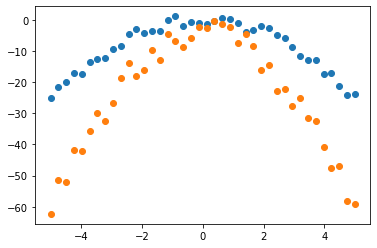

In [2]:
X = np.linspace(0, 10, 40).reshape((-1,1))-5
T1 = -X**2 + np.random.uniform(-2, 2, size=(40, 1))
T2 = -(1.5*X)**2 + np.random.uniform(-5, 5, size=(40, 1))-5
plt.plot(X, T1, 'o')
plt.plot(X, T2, 'o')

Let's do something similar, except this time let's not *fit* a curve to the data but fit a curve *between* sections of the data.

This curve would then be a ____________ function? (hint: begins with D)

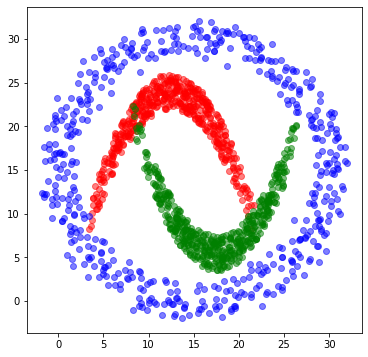

In [3]:
n = 500
x1 = np.linspace(5, 20, n) + np.random.uniform(-2, 2, n)
y1 = ((20-12.5)**2-(x1-12.5)**2) / (20-12.5)**2 * 10 + 14 + np.random.uniform(-2, 2, n)
x2 = np.linspace(10, 25, n) + np.random.uniform(-2, 2, n)
y2 = ((x2-17.5)**2) / (25-17.5)**2 * 10 + 5.5 + np.random.uniform(-2, 2, n)
angles = np.linspace(0, 2*np.pi, n)
x3 = np.cos(angles) * 15 + 15 + np.random.uniform(-2, 2, n)
y3 = np.sin(angles) * 15 + 15 + np.random.uniform(-2, 2, n)
X =  np.vstack((np.hstack((x1, x2, x3)),  np.hstack((y1, y2, y3)))).T
T = np.repeat(range(1, 4), n).reshape((-1, 1))
colors = ['red', 'green', 'blue']
plt.figure(figsize=(6, 6))
for c in range(1, 4):
    mask = (T == c).flatten()
    plt.plot(X[mask, 0], X[mask, 1], 'o', markersize=6,  alpha=0.5,  color=colors[c-1])

Let's try to classify this data with a 5 hidden unit neural network with nonlinear logistic regression.  In Python, do this by defining a new class `NeuralNetworkClassifier` it is easy to create a new class for using a neural network
as a classifier by making a subclass `NeuralNetworkClassifier` of the
`NeuralNetwork` and make the required changes.  Most of the changes will be in `error_f`, `gradient_f`, `train` and `use` methods.

sgd: Epoch 2000 Error=0.76414
sgd: Epoch 4000 Error=0.78543
sgd: Epoch 6000 Error=0.87312
sgd: Epoch 8000 Error=0.89841
sgd: Epoch 10000 Error=0.90782
sgd: Epoch 12000 Error=0.91391
sgd: Epoch 14000 Error=0.92005
sgd: Epoch 16000 Error=0.92713
sgd: Epoch 18000 Error=0.93462
sgd: Epoch 20000 Error=0.94029


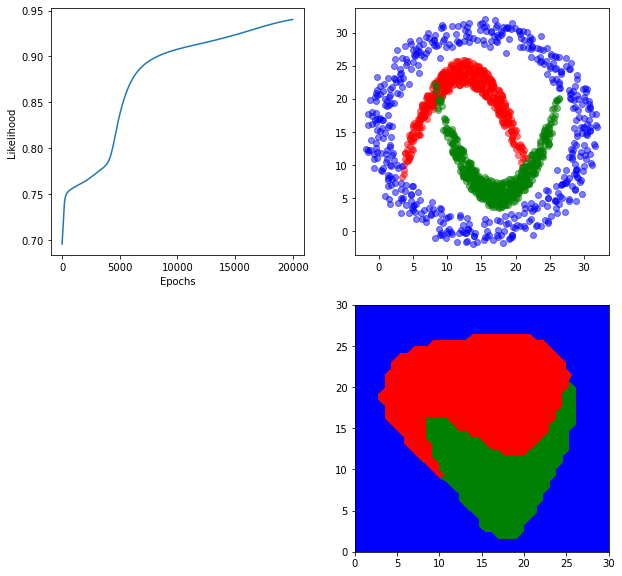

In [4]:
import neuralnetworks_A5 as nn
import mpl_toolkits.mplot3d as plt3
from matplotlib import cm

# if you edit neuralnetwork.py, force ipython to reload it by doing this.
from imp import reload
reload(nn)

nHidden = [5]
nnet = nn.NeuralNetworkClassifier(2, nHidden, 3) # 3 classes, will actually make 2-unit output layer
nnet.train(X, T, n_epochs=20000,  learning_rate=0.1)

xs = np.linspace(0, 30, 40)
x, y = np.meshgrid(xs, xs)
Xtest = np.vstack((x.flat, y.flat)).T
Ytest = nnet.use(Xtest)
predTest, probs = nnet.use(Xtest)

plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(nnet.error_trace)
plt.xlabel("Epochs")
plt.ylabel("Likelihood")

# plt.subplot(2, 2, 3)
# nnet.draw()

colors = ['red', 'green', 'blue']
plt.subplot(2, 2, 2)

for c in range(1, 4):
    mask = (T == c).flatten()
    plt.plot(X[mask, 0], X[mask, 1], 'o', markersize=6,  alpha=0.5,  color=colors[c-1])

plt.subplot(2, 2, 4)
plt.contourf(Xtest[:, 0].reshape((40, 40)), Xtest[:, 1].reshape((40, 40)),  predTest.reshape((40, 40)), 
             levels = [0.5, 1.99, 2.01, 3.5],  #    levels=(0.5, 1.5, 2.5, 3.5), 
             colors=('red', 'green', 'blue'));

In [5]:
from matplotlib.colors import LightSource

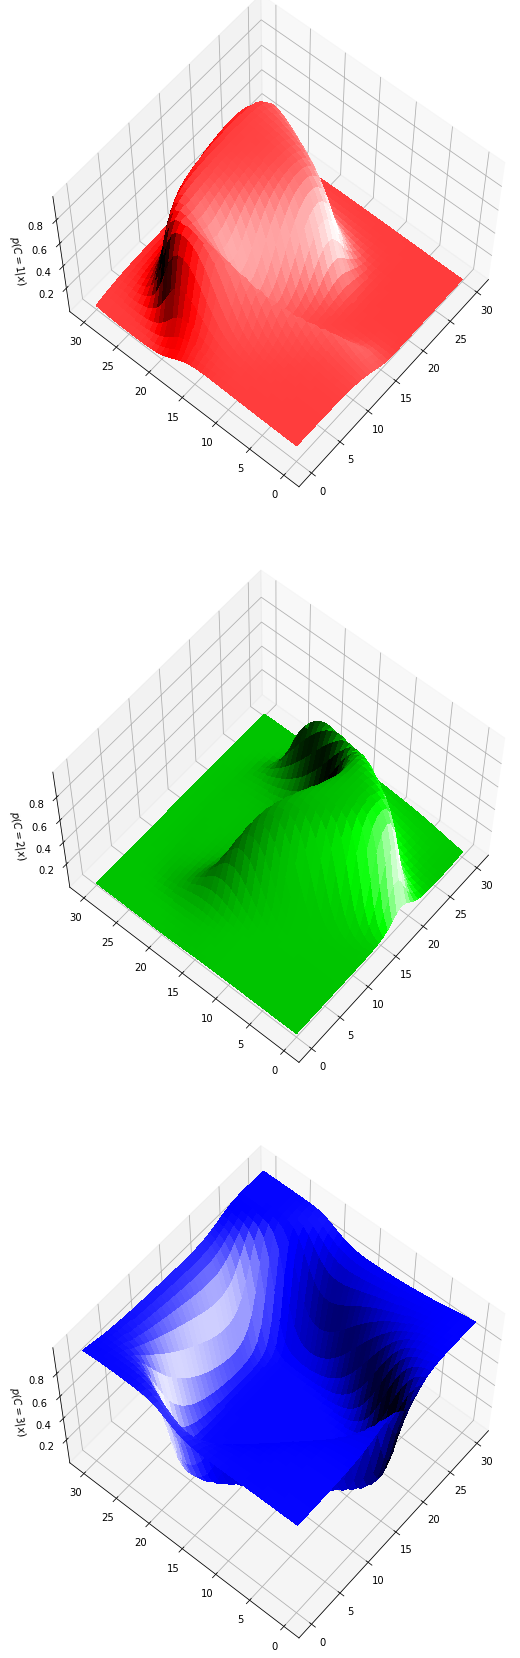

In [6]:
fig = plt.figure(figsize=(10, 30))
ls = LightSource(azdeg=30,  altdeg=60)
white = np.ones((x.shape[0],  x.shape[1],  3))
red = white * np.array([1, 0, 0])
green = white * np.array([0, 1, 0])
blue = white * np.array([0, 0, 1])
colors = [red,  green,  blue]

for c in range(3):
    ax = fig.add_subplot(3, 1, c+1, projection='3d')
    ax.view_init(azim = 180+40, elev = 60)
    Z = probs[:,  c].reshape(x.shape)
    rgb = ls.shade_rgb(colors[c],  Z,  vert_exag=0.1)
    ax.plot_surface(x, y, Z, 
                    rstride=1, cstride=1, linewidth=0,  antialiased=False, 
                    shade=False,  facecolors=rgb)
    ax.set_zlabel(r"$p(C="+str(c+1)+"|x)$")

How would you plot the outputs of the hidden units? (Hint: See notebook 7.2)

Let's repeat the experiment with classifying human activity data ([accelerometers.npy](https://www.cs.colostate.edu/~cs445/notebooks/accelerometers.npy)),  but now use our *NeuralNetworkClassifier* class to do nonlinear logistic regression.  This time we will retrieve and load *accelerometers.npy*,  a file containing a *numpy* array stored in its binary format.

In [7]:
data = np.load('accelerometers.npy')

First let's talk about what's in this data: the name `accelerometers.npy` obfuscates what's in this.

It's a bunch of data logging what activity people are performing compared to an accelerometer they carry.

In short: "Based on how I was moving, can you tell what I was doing?" (Walking, playing with Legos, playing Nintendo Wii games, climbing stairs, etc.)

Inputs `X` is motion data, outputs `T` are class labels corresponding to activities.

In [8]:
data.shape

(225006, 4)

In [9]:
data[0, :], data[-1, :]

(array([ 1.        , -0.87313405, -0.08552787, -0.29504612]),
 array([10.        , -0.76412224, -3.82032757,  1.42839985]))

Check out these samples.  What looks like inputs and what looks like outputs?

In [10]:
X = data[:, 1:]
T = data[:, 0:1]
X.shape,  T.shape

((225006, 3), (225006, 1))

In [11]:
def generate_k_fold_cross_validation_sets(X, T, n_folds, shuffle=True):

    if shuffle:
        # Randomly order X and T
        randorder = np.arange(X.shape[0])
        np.random.shuffle(randorder)
        X = X[randorder, :]
        T = T[randorder, :]

    # Partition X and T into folds
    n_samples = X.shape[0]
    n_per_fold = round(n_samples / n_folds)
    n_last_fold = n_samples - n_per_fold * (n_folds - 1)

    folds = []
    start = 0
    for foldi in range(n_folds-1):
        folds.append( (X[start:start + n_per_fold, :], T[start:start + n_per_fold, :]) )
        start += n_per_fold
    folds.append( (X[start:, :], T[start:, :]) )

    # Yield k(k-1) assignments of Xtrain, Train, Xvalidate, Tvalidate, Xtest, Ttest

    for validation_i in range(n_folds):
        for test_i in range(n_folds):
            if test_i == validation_i:
                continue

            train_i = np.setdiff1d(range(n_folds), [validation_i, test_i])

            Xvalidate, Tvalidate = folds[validation_i]
            Xtest, Ttest = folds[test_i]
            if len(train_i) > 1:
                Xtrain = np.vstack([folds[i][0] for i in train_i])
                Ttrain = np.vstack([folds[i][1] for i in train_i])
            else:
                Xtrain, Ttrain = folds[train_i[0]]

            yield Xtrain, Ttrain, Xvalidate, Tvalidate, Xtest, Ttest

In [12]:
X.shape

(225006, 3)

What's `yield`?

`yield` suspends execution and returns the functions current state back to the caller, but retains state information and can resume execution (unlike `return` which exits the function at that point entirely.

A "functional"-like operator in Python.  Kind of like a "continuation" (ask me about Haskell sometime!)

In [13]:
def times2():
    for i in range(10):
        yield i * 2

In [14]:
list(times2())

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]

In [15]:
z = times2()
z

<generator object times2 at 0x000001B8DAB27648>

In [16]:
next(z)

0

In [17]:
next(z)

2

In [18]:
Xtrain,  Ttrain,  Xval, Tval, Xtest,  Ttest = next(generate_k_fold_cross_validation_sets(X,  T,  n_folds=3))

In [19]:
Xtrain.shape, Ttrain.shape, Xval.shape, Tval.shape, Xtest.shape, Ttest.shape

((75002, 3), (75002, 1), (75002, 3), (75002, 1), (75002, 3), (75002, 1))

In [20]:
np.unique?

In [21]:
np.unique(Ttrain,  return_counts=True)

(array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 array([7565, 7591, 7424, 7534, 7442, 7412, 7509, 7495, 7529, 7501],
       dtype=int64))

There are 10 classes and for each class $k$, there are $k'$ instances of that class in our data.

We can control how many digits after the decimal point are printed for `numpy.array` values.

In [22]:
%precision 5

'%.5f'

In [23]:
values, counts = np.unique(Ttrain,  return_counts=True)
counts / Ttrain.shape[0] # counts per class divided by number of samples

array([0.10086, 0.10121, 0.09898, 0.10045, 0.09922, 0.09882, 0.10012,
       0.09993, 0.10038, 0.10001])

In [24]:
values, counts = np.unique(Tval,  return_counts=True)
counts / Tval.shape[0]

array([0.1005 , 0.09974, 0.10037, 0.09949, 0.10033, 0.10037, 0.10121,
       0.09862, 0.09952, 0.09984])

In [25]:
values, counts = np.unique(Ttest,  return_counts=True)
counts / Ttest.shape[0]

array([0.09865, 0.09904, 0.10064, 0.10005, 0.10044, 0.10082, 0.09866,
       0.10144, 0.10012, 0.10014])

This data is fairly well-balanced, with about 10% of the data falling into each class.

Adam: Epoch 10 Error=0.82847
Adam: Epoch 20 Error=0.84700
Adam: Epoch 30 Error=0.85618
Adam: Epoch 40 Error=0.85980
Adam: Epoch 50 Error=0.86311
Adam: Epoch 60 Error=0.86546
Adam: Epoch 70 Error=0.86726
Adam: Epoch 80 Error=0.86878
Adam: Epoch 90 Error=0.87014
Adam: Epoch 100 Error=0.87138
Training took 9.424793481826782 seconds.


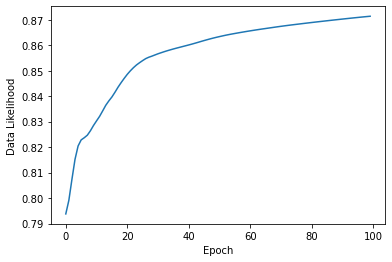

In [26]:
import time

n_classes = len(np.unique(T))

start_time = time.time()

# Constructing a neural network classifier
# Step 1: Input layer of size N, where N is the number of parameters in each input sample
# Step 2: ?????
# Step 3: Profit (output layer the same size as the number of classes you have)
nnet = nn.NeuralNetworkClassifier(X.shape[1], [10],  n_classes) 
nnet.train(Xtrain, Ttrain, n_epochs=100, learning_rate=0.1, method='adam')

elapsed_time = time.time() - start_time
print(f'Training took {elapsed_time} seconds.')

plt.plot(nnet.error_trace)
plt.xlabel('Epoch')
plt.ylabel('Data Likelihood');

For classification problems, we would like to see the percent of samples from each class that are classified corectly.  It is also revealing to see to which classes the misclassified samples are assigned.

Now that we're dealing with classes, accuracy is a more meaningful metric as opposed to error alone.

This is typically called a *Confusion Matrix*.  This is a table of classification percents for all pairs of target classes and predicted classes.  A row of the confusion matrix corresponds to a target class, and the columns are the predicted classes.  So, the diagonal shows the percent of samples that are correctly classified for each target class.

In [27]:
Classes, Probs = nnet.use(Xtrain)
table = []
for true_class in range(1, 11):
    row = []
    for predicted_class in range(1, 11):
        row.append(100 * np.mean(Classes[Ttrain == true_class] == predicted_class))
        # row.append(f'{100 * np.mean(Classes[Ttrain == true_class] == predicted_class):0.1f}')
    table.append(row)
table

[[96.66886979510906,
  0.07931262392597488,
  0.8988764044943821,
  0.013218770654329148,
  2.1150033046926633,
  0.0,
  0.0,
  0.18506278916060806,
  0.03965631196298744,
  0.0],
 [17.40218680015808,
  57.21248847319194,
  17.678830193650374,
  0.10538795942563561,
  1.6335133710973522,
  0.03952048478461336,
  0.13173494928204452,
  2.858648399420366,
  1.2119615333948097,
  1.7257278355947834],
 [4.323814655172414,
  9.752155172413794,
  63.119612068965516,
  2.209051724137931,
  3.650323275862069,
  3.3270474137931036,
  3.2866379310344827,
  3.9331896551724137,
  0.8485991379310345,
  5.549568965517242],
 [4.021767985134058,
  7.260419431908681,
  27.15688877090523,
  8.216087071940537,
  13.392620122113088,
  11.003451022033449,
  6.6764003185558805,
  6.543668701884789,
  5.1765330501725515,
  10.55216352535174],
 [8.357968288094598,
  8.747648481590971,
  12.4966406879871,
  2.6471378661650093,
  33.99623757054555,
  1.7468422467078741,
  1.9484009674818596,
  9.258263907551733

Of course, this is easier to read as a `pandas.DataFrame`.

In [28]:
class_names = ('1-Rest', '2-Coloring', '3-Legos', '4-Wii Tennis', '5-Wii Boxing', '6-0.75m/s',
               '7-1.25m/s', '8-1.75m/s', '9-2.25m/s', '10-Stairs')
class_names

('1-Rest',
 '2-Coloring',
 '3-Legos',
 '4-Wii Tennis',
 '5-Wii Boxing',
 '6-0.75m/s',
 '7-1.25m/s',
 '8-1.75m/s',
 '9-2.25m/s',
 '10-Stairs')

In [29]:
import pandas
conf_matrix = pandas.DataFrame(table, index=class_names, columns=class_names)
conf_matrix

,1-Rest,2-Coloring,3-Legos,4-Wii Tennis,5-Wii Boxing,6-0.75m/s,7-1.25m/s,8-1.75m/s,9-2.25m/s,10-Stairs
1-Rest,96.668870,0.079313,0.898876,0.013219,2.115003,0.000000,0.000000,0.185063,0.039656,0.000000
2-Coloring,17.402187,57.212488,17.678830,0.105388,1.633513,0.039520,0.131735,2.858648,1.211962,1.725728
3-Legos,4.323815,9.752155,63.119612,2.209052,3.650323,3.327047,3.286638,3.933190,0.848599,5.549569
4-Wii Tennis,4.021768,7.260419,27.156889,8.216087,13.392620,11.003451,6.676400,6.543669,5.176533,10.552164
5-Wii Boxing,8.357968,8.747648,12.496641,2.647138,33.996238,1.746842,1.948401,9.258264,17.092180,3.708680
6-0.75m/s,0.040475,0.350783,0.067458,0.067458,0.080950,76.686454,19.009714,0.350783,0.580140,2.765785
7-1.25m/s,0.013317,0.239712,0.372886,0.346251,0.039952,37.967772,52.457052,1.464909,0.799041,6.299108
8-1.75m/s,0.573716,0.947298,7.605070,2.041361,8.458973,2.761841,3.015344,27.538359,42.414943,4.643095
9-2.25m/s,0.252358,1.248506,6.043299,1.646965,9.390357,3.041573,1.739939,19.750299,53.738876,3.147828
10-Stairs,0.093321,8.158912,11.851753,5.945874,2.759632,17.424343,19.797360,5.945874,6.599120,21.423810


Time for some more `pandas` wizardry.  Help on the many options is available at [this Towards Data Science post](https://towardsdatascience.com/style-pandas-dataframe-like-a-master-6b02bf6468b0) and [this documentation on Pandas Styling](https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html).

In [30]:
conf_matrix.style.format("{:.1f} %")

,1-Rest,2-Coloring,3-Legos,4-Wii Tennis,5-Wii Boxing,6-0.75m/s,7-1.25m/s,8-1.75m/s,9-2.25m/s,10-Stairs
1-Rest,96.7 %,0.1 %,0.9 %,0.0 %,2.1 %,0.0 %,0.0 %,0.2 %,0.0 %,0.0 %
2-Coloring,17.4 %,57.2 %,17.7 %,0.1 %,1.6 %,0.0 %,0.1 %,2.9 %,1.2 %,1.7 %
3-Legos,4.3 %,9.8 %,63.1 %,2.2 %,3.7 %,3.3 %,3.3 %,3.9 %,0.8 %,5.5 %
4-Wii Tennis,4.0 %,7.3 %,27.2 %,8.2 %,13.4 %,11.0 %,6.7 %,6.5 %,5.2 %,10.6 %
5-Wii Boxing,8.4 %,8.7 %,12.5 %,2.6 %,34.0 %,1.7 %,1.9 %,9.3 %,17.1 %,3.7 %
6-0.75m/s,0.0 %,0.4 %,0.1 %,0.1 %,0.1 %,76.7 %,19.0 %,0.4 %,0.6 %,2.8 %
7-1.25m/s,0.0 %,0.2 %,0.4 %,0.3 %,0.0 %,38.0 %,52.5 %,1.5 %,0.8 %,6.3 %
8-1.75m/s,0.6 %,0.9 %,7.6 %,2.0 %,8.5 %,2.8 %,3.0 %,27.5 %,42.4 %,4.6 %
9-2.25m/s,0.3 %,1.2 %,6.0 %,1.6 %,9.4 %,3.0 %,1.7 %,19.8 %,53.7 %,3.1 %
10-Stairs,0.1 %,8.2 %,11.9 %,5.9 %,2.8 %,17.4 %,19.8 %,5.9 %,6.6 %,21.4 %


The above function call does not save the style in `conf_matrix`.

In [31]:
conf_matrix

,1-Rest,2-Coloring,3-Legos,4-Wii Tennis,5-Wii Boxing,6-0.75m/s,7-1.25m/s,8-1.75m/s,9-2.25m/s,10-Stairs
1-Rest,96.668870,0.079313,0.898876,0.013219,2.115003,0.000000,0.000000,0.185063,0.039656,0.000000
2-Coloring,17.402187,57.212488,17.678830,0.105388,1.633513,0.039520,0.131735,2.858648,1.211962,1.725728
3-Legos,4.323815,9.752155,63.119612,2.209052,3.650323,3.327047,3.286638,3.933190,0.848599,5.549569
4-Wii Tennis,4.021768,7.260419,27.156889,8.216087,13.392620,11.003451,6.676400,6.543669,5.176533,10.552164
5-Wii Boxing,8.357968,8.747648,12.496641,2.647138,33.996238,1.746842,1.948401,9.258264,17.092180,3.708680
6-0.75m/s,0.040475,0.350783,0.067458,0.067458,0.080950,76.686454,19.009714,0.350783,0.580140,2.765785
7-1.25m/s,0.013317,0.239712,0.372886,0.346251,0.039952,37.967772,52.457052,1.464909,0.799041,6.299108
8-1.75m/s,0.573716,0.947298,7.605070,2.041361,8.458973,2.761841,3.015344,27.538359,42.414943,4.643095
9-2.25m/s,0.252358,1.248506,6.043299,1.646965,9.390357,3.041573,1.739939,19.750299,53.738876,3.147828
10-Stairs,0.093321,8.158912,11.851753,5.945874,2.759632,17.424343,19.797360,5.945874,6.599120,21.423810


We can add colored backgrounds to provide quick visual comparison.

In [32]:
conf_matrix.style.background_gradient(cmap='Blues')

,1-Rest,2-Coloring,3-Legos,4-Wii Tennis,5-Wii Boxing,6-0.75m/s,7-1.25m/s,8-1.75m/s,9-2.25m/s,10-Stairs
1-Rest,96.668870,0.079313,0.898876,0.013219,2.115003,0.000000,0.000000,0.185063,0.039656,0.000000
2-Coloring,17.402187,57.212488,17.678830,0.105388,1.633513,0.039520,0.131735,2.858648,1.211962,1.725728
3-Legos,4.323815,9.752155,63.119612,2.209052,3.650323,3.327047,3.286638,3.933190,0.848599,5.549569
4-Wii Tennis,4.021768,7.260419,27.156889,8.216087,13.392620,11.003451,6.676400,6.543669,5.176533,10.552164
5-Wii Boxing,8.357968,8.747648,12.496641,2.647138,33.996238,1.746842,1.948401,9.258264,17.092180,3.708680
6-0.75m/s,0.040475,0.350783,0.067458,0.067458,0.080950,76.686454,19.009714,0.350783,0.580140,2.765785
7-1.25m/s,0.013317,0.239712,0.372886,0.346251,0.039952,37.967772,52.457052,1.464909,0.799041,6.299108
8-1.75m/s,0.573716,0.947298,7.605070,2.041361,8.458973,2.761841,3.015344,27.538359,42.414943,4.643095
9-2.25m/s,0.252358,1.248506,6.043299,1.646965,9.390357,3.041573,1.739939,19.750299,53.738876,3.147828
10-Stairs,0.093321,8.158912,11.851753,5.945874,2.759632,17.424343,19.797360,5.945874,6.599120,21.423810


And combine these two styles by applying multiple styles in object-oriented fashion.

In [33]:
conf_matrix.style.background_gradient(cmap='Blues').format("{:.1f} %")

,1-Rest,2-Coloring,3-Legos,4-Wii Tennis,5-Wii Boxing,6-0.75m/s,7-1.25m/s,8-1.75m/s,9-2.25m/s,10-Stairs
1-Rest,96.7 %,0.1 %,0.9 %,0.0 %,2.1 %,0.0 %,0.0 %,0.2 %,0.0 %,0.0 %
2-Coloring,17.4 %,57.2 %,17.7 %,0.1 %,1.6 %,0.0 %,0.1 %,2.9 %,1.2 %,1.7 %
3-Legos,4.3 %,9.8 %,63.1 %,2.2 %,3.7 %,3.3 %,3.3 %,3.9 %,0.8 %,5.5 %
4-Wii Tennis,4.0 %,7.3 %,27.2 %,8.2 %,13.4 %,11.0 %,6.7 %,6.5 %,5.2 %,10.6 %
5-Wii Boxing,8.4 %,8.7 %,12.5 %,2.6 %,34.0 %,1.7 %,1.9 %,9.3 %,17.1 %,3.7 %
6-0.75m/s,0.0 %,0.4 %,0.1 %,0.1 %,0.1 %,76.7 %,19.0 %,0.4 %,0.6 %,2.8 %
7-1.25m/s,0.0 %,0.2 %,0.4 %,0.3 %,0.0 %,38.0 %,52.5 %,1.5 %,0.8 %,6.3 %
8-1.75m/s,0.6 %,0.9 %,7.6 %,2.0 %,8.5 %,2.8 %,3.0 %,27.5 %,42.4 %,4.6 %
9-2.25m/s,0.3 %,1.2 %,6.0 %,1.6 %,9.4 %,3.0 %,1.7 %,19.8 %,53.7 %,3.1 %
10-Stairs,0.1 %,8.2 %,11.9 %,5.9 %,2.8 %,17.4 %,19.8 %,5.9 %,6.6 %,21.4 %


Okay.  Let's try a bigger network.  Maybe we can increase some of those accuracies along the diagonal.

Adam: Epoch 100 Error=0.88457
Adam: Epoch 200 Error=0.89113
Adam: Epoch 300 Error=0.88971
Adam: Epoch 400 Error=0.89351
Adam: Epoch 500 Error=0.87411
Adam: Epoch 600 Error=0.88650
Adam: Epoch 700 Error=0.87848
Adam: Epoch 800 Error=0.89348
Adam: Epoch 900 Error=0.89050
Adam: Epoch 1000 Error=0.89550
Training took 542.0144090652466 seconds.


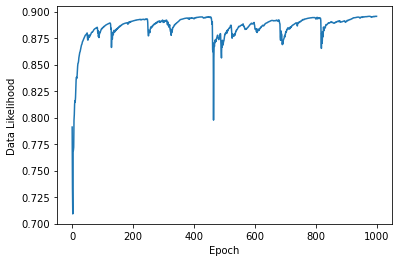

In [35]:
# Note: DO NOT RUN THIS CELL LIVE!  TAKES FOREVER!

start_time = time.time()

bignet = nn.NeuralNetworkClassifier(X.shape[1], [100, 50],  n_classes) 
bignet.train(Xtrain, Ttrain, n_epochs=1000, learning_rate=0.1, method='adam')

elapsed_time = time.time() - start_time
print(f'Training took {elapsed_time} seconds.')

plt.plot(bignet.error_trace)
plt.xlabel('Epoch')
plt.ylabel('Data Likelihood');

In [36]:
Classes, Probs = bignet.use(Xtrain)
table = []
for true_class in range(1, 11):
    row = []
    for predicted_class in range(1, 11):
        row.append(100 * np.mean(Classes[Ttrain == true_class] == predicted_class))
        # row.append(f'{100 * np.mean(Classes[Ttrain == true_class] == predicted_class):0.1f}')
    table.append(row)
    
print(f'Train percent correct {np.mean(Classes == Ttrain) * 100:.2f}') 

conf_matrix = pandas.DataFrame(table, index=class_names, columns=class_names)
conf_matrix.style.background_gradient(cmap='Blues').format("{:.1f} %")

Train percent correct 58.49


,1-Rest,2-Coloring,3-Legos,4-Wii Tennis,5-Wii Boxing,6-0.75m/s,7-1.25m/s,8-1.75m/s,9-2.25m/s,10-Stairs
1-Rest,96.2 %,2.0 %,0.6 %,0.2 %,0.7 %,0.0 %,0.0 %,0.2 %,0.1 %,0.0 %
2-Coloring,1.8 %,86.3 %,5.5 %,1.4 %,2.5 %,0.0 %,0.1 %,0.7 %,0.7 %,1.1 %
3-Legos,0.2 %,5.1 %,70.2 %,7.4 %,6.1 %,2.3 %,1.6 %,2.2 %,0.2 %,4.8 %
4-Wii Tennis,0.6 %,5.3 %,21.5 %,21.9 %,12.3 %,8.9 %,5.3 %,6.0 %,3.6 %,14.7 %
5-Wii Boxing,0.7 %,5.3 %,10.2 %,4.8 %,54.7 %,0.5 %,1.5 %,9.1 %,8.6 %,4.6 %
6-0.75m/s,0.0 %,0.1 %,0.5 %,0.5 %,0.2 %,74.2 %,18.3 %,0.7 %,0.4 %,5.1 %
7-1.25m/s,0.0 %,0.1 %,0.7 %,1.0 %,0.2 %,28.9 %,59.8 %,1.5 %,0.2 %,7.5 %
8-1.75m/s,0.1 %,1.9 %,5.5 %,4.5 %,8.5 %,1.3 %,2.8 %,45.8 %,23.5 %,6.1 %
9-2.25m/s,0.0 %,1.2 %,4.2 %,3.2 %,9.5 %,0.9 %,2.1 %,32.1 %,42.7 %,4.2 %
10-Stairs,0.1 %,2.3 %,12.5 %,8.3 %,3.9 %,12.6 %,16.6 %,7.1 %,3.6 %,33.1 %


Now let's check the validation and test sets.

In [37]:
Classes, Probs = bignet.use(Xval)
table = []
for true_class in range(1, 11):
    row = []
    for predicted_class in range(1, 11):
        row.append(100 * np.mean(Classes[Tval == true_class] == predicted_class))
        # row.append(f'{100 * np.mean(Classes[Ttrain == true_class] == predicted_class):0.1f}')
    table.append(row)

print(f'Val percent correct {np.mean(Classes == Tval) * 100:.2f}') 

conf_matrix = pandas.DataFrame(table, index=class_names, columns=class_names)
conf_matrix.style.background_gradient(cmap='Blues').format("{:.1f} %")

Val percent correct 57.35


,1-Rest,2-Coloring,3-Legos,4-Wii Tennis,5-Wii Boxing,6-0.75m/s,7-1.25m/s,8-1.75m/s,9-2.25m/s,10-Stairs
1-Rest,96.2 %,2.2 %,0.6 %,0.2 %,0.7 %,0.0 %,0.0 %,0.1 %,0.1 %,0.0 %
2-Coloring,1.5 %,85.8 %,6.1 %,1.5 %,2.8 %,0.0 %,0.0 %,0.7 %,0.4 %,1.3 %
3-Legos,0.1 %,5.6 %,69.0 %,8.4 %,6.4 %,1.7 %,1.5 %,2.0 %,0.5 %,4.9 %
4-Wii Tennis,0.6 %,5.5 %,21.0 %,21.5 %,13.6 %,8.9 %,5.6 %,6.1 %,3.9 %,13.4 %
5-Wii Boxing,0.7 %,5.9 %,10.3 %,4.3 %,52.1 %,0.4 %,1.3 %,9.8 %,10.2 %,5.0 %
6-0.75m/s,0.0 %,0.1 %,0.5 %,0.6 %,0.3 %,73.3 %,19.5 %,0.5 %,0.2 %,4.9 %
7-1.25m/s,0.0 %,0.1 %,1.0 %,0.9 %,0.2 %,28.2 %,59.0 %,1.5 %,0.5 %,8.6 %
8-1.75m/s,0.0 %,1.9 %,6.0 %,4.4 %,9.1 %,1.1 %,3.4 %,43.4 %,24.1 %,6.6 %
9-2.25m/s,0.0 %,1.2 %,4.5 %,3.3 %,10.8 %,1.2 %,2.2 %,32.5 %,40.0 %,4.3 %
10-Stairs,0.0 %,2.5 %,12.8 %,8.5 %,4.0 %,12.7 %,17.0 %,6.3 %,3.8 %,32.4 %


In [38]:
Classes, Probs = bignet.use(Xtest)
table = []
for true_class in range(1, 11):
    row = []
    for predicted_class in range(1, 11):
        row.append(100 * np.mean(Classes[Ttest == true_class] == predicted_class))
        # row.append(f'{100 * np.mean(Classes[Ttrain == true_class] == predicted_class):0.1f}')
    table.append(row)
    
print(f'Test percent correct {np.mean(Classes == Ttest) * 100:.2f}') 

conf_matrix = pandas.DataFrame(table, index=class_names, columns=class_names)
conf_matrix.style.background_gradient(cmap='Blues').format("{:.1f} %")

Test percent correct 57.24


,1-Rest,2-Coloring,3-Legos,4-Wii Tennis,5-Wii Boxing,6-0.75m/s,7-1.25m/s,8-1.75m/s,9-2.25m/s,10-Stairs
1-Rest,96.0 %,2.0 %,0.6 %,0.3 %,0.9 %,0.0 %,0.0 %,0.1 %,0.2 %,0.0 %
2-Coloring,1.6 %,85.9 %,6.0 %,1.4 %,2.7 %,0.0 %,0.1 %,0.6 %,0.4 %,1.3 %
3-Legos,0.1 %,5.0 %,68.0 %,8.7 %,6.9 %,2.0 %,1.6 %,2.1 %,0.4 %,5.1 %
4-Wii Tennis,0.6 %,5.8 %,20.4 %,21.4 %,13.2 %,9.1 %,5.5 %,6.6 %,3.6 %,13.9 %
5-Wii Boxing,0.6 %,5.7 %,9.7 %,5.2 %,53.1 %,0.6 %,1.5 %,9.1 %,10.0 %,4.5 %
6-0.75m/s,0.0 %,0.1 %,0.4 %,0.4 %,0.4 %,73.9 %,18.6 %,0.7 %,0.2 %,5.3 %
7-1.25m/s,0.0 %,0.1 %,1.0 %,1.1 %,0.3 %,29.1 %,58.4 %,1.6 %,0.3 %,8.0 %
8-1.75m/s,0.0 %,1.8 %,6.2 %,3.9 %,9.9 %,1.2 %,3.3 %,43.7 %,23.3 %,6.7 %
9-2.25m/s,0.0 %,1.2 %,4.6 %,3.3 %,9.6 %,1.1 %,2.1 %,32.8 %,40.7 %,4.5 %
10-Stairs,0.1 %,2.8 %,12.5 %,8.0 %,4.5 %,12.8 %,16.9 %,6.5 %,3.6 %,32.3 %


What about a different data representation, maybe one involving frequencies to represent movement?

One such representation is based on the [continuous wavelet transform](https://en.wikipedia.org/wiki/Continuous_wavelet_transform), or cwt.  Here is some code that applies a cwt to our accelerometer data.  What it will do is convert the accelerometer data to a waveform approximating the frequency and amplitude of the motion.

In [39]:
import scipy.signal as sig

def cwt(eeg, Fs, freqs, width, channelNames=None, graphics=False):
    if freqs.min() == 0:
        print('cwt: Frequencies must be greater than 0.')
        return None, None
    nChannels, nSamples = eeg.shape
    if not channelNames and graphics:
        channelNames = [f'Channel {i:2d}' for i in range(nChannels)]

    nFreqs = len(freqs)
    tfrep = np.zeros((nChannels,  nFreqs, nSamples))
    tfrepPhase = np.zeros((nChannels, nFreqs, nSamples))

    for ch in range(nChannels):
        print('channel', ch, ' freq ', end='')
        for freqi in range(nFreqs):
            print(freqs[freqi], ' ', end='')
            mag, phase = energyvec(freqs[freqi], eeg[ch, :], Fs, width)
            tfrepPhase[ch, freqi, :] = phase
            tfrep[ch, freqi, :] = mag
        print()

    return tfrep, tfrepPhase

def morletLength(Fs, f, width):
  ''' len = morletLength(Fs, f, width) '''
  dt = 1.0/Fs
  sf = f/width
  st = 1.0/(2*np.pi*sf)
  return int((3.5*st - -3.5*st)/dt)

def energyvec(f, s, Fs, width):
  '''
  function [y, phase] <- energyvec(f, s, Fs, width)
  function y <- energyvec(f, s, Fs, width)

  Return a vector containing the energy as a
  function of time for frequency f. The energy
  is calculated using Morlet''s wavelets.
  s : signal
  Fs: sampling frequency
  width : width of Morlet wavelet (><- 5 suggested).
  '''

  dt = 1.0 / Fs
  sf = f / width
  st = 1.0 / (2 * np.pi * sf)

  t = np.arange(-3.5 * st, 3.5 * st, step=dt)
  m = morlet(f, t, width)
  # yconv = np.convolve(s, m, mode="same")
  yconv = sig.fftconvolve(s, m, mode='same')

  lengthMorlet = len(m)
  firsthalf = int(lengthMorlet / 2.0 + 0.5)
  secondhalf = lengthMorlet - firsthalf

  padtotal = len(s) - len(yconv)
  padfront = int(padtotal / 2.0 + 0.5)
  padback = padtotal - padfront
  yconvNoBoundary = yconv
  y = np.abs(yconvNoBoundary)**2
  phase = np.angle(yconvNoBoundary, deg=True)
  return y, phase

######################################################################
      
def morlet(f, t, width):
    '''
    function y <- morlet(f, t, width)
    Morlet''s wavelet for frequency f and time t.
    The wavelet will be normalized so the total energy is 1.
    width defines the width of the wavelet.
    A value ><- 5 is suggested.

    Ref: Tallon-Baudry et al., J. Neurosci. 15, 722-734 (1997), page 724

    Ole Jensen, August 1998
    '''
    sf = f / width
    st = 1.0 / (2 * np.pi * sf)
    A = 1.0 / np.sqrt(st * np.sqrt(2 * np.pi))
    y = A * np.exp(-t ** 2 / (2 * st ** 2)) * np.exp(1j * 2 * np.pi * f * t)
    return y

In [40]:
width = 75 
maxFreq = 20
freqs = np.arange(0.5, maxFreq, 0.5) # makes same freqs used in stft above
start_time = time.time()
tfrep, tfrepPhase = cwt(data[:, 1:].T,  75,  freqs,  width)
elapsed = time.time() - start_time
print(f'CWT time: {elapsed} seconds')

channel 0  freq 0.5  1.0  1.5  2.0  2.5  3.0  3.5  4.0  4.5  5.0  5.5  6.0  6.5  7.0  7.5  8.0  8.5  9.0  9.5  10.0  10.5  11.0  11.5  12.0  12.5  13.0  13.5  14.0  14.5  15.0  15.5  16.0  16.5  17.0  17.5  18.0  18.5  19.0  19.5  
channel 1  freq 0.5  1.0  1.5  2.0  2.5  3.0  3.5  4.0  4.5  5.0  5.5  6.0  6.5  7.0  7.5  8.0  8.5  9.0  9.5  10.0  10.5  11.0  11.5  12.0  12.5  13.0  13.5  14.0  14.5  15.0  15.5  16.0  16.5  17.0  17.5  18.0  18.5  19.0  19.5  
channel 2  freq 0.5  1.0  1.5  2.0  2.5  3.0  3.5  4.0  4.5  5.0  5.5  6.0  6.5  7.0  7.5  8.0  8.5  9.0  9.5  10.0  10.5  11.0  11.5  12.0  12.5  13.0  13.5  14.0  14.5  15.0  15.5  16.0  16.5  17.0  17.5  18.0  18.5  19.0  19.5  
CWT time: 4.06309962272644 seconds


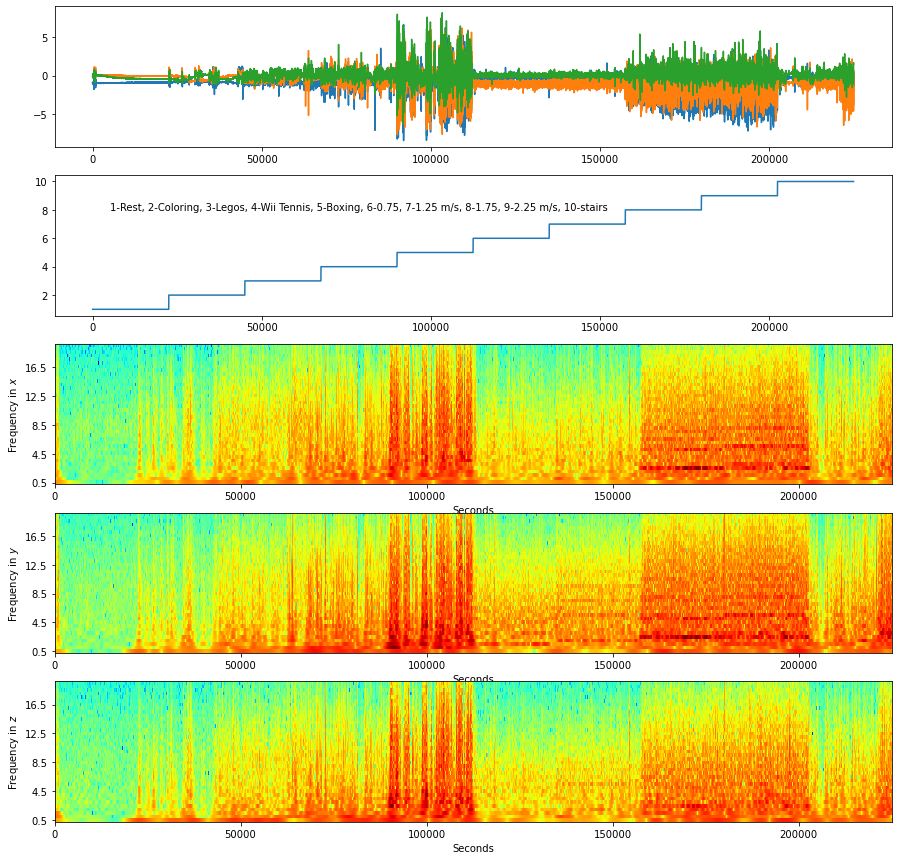

In [41]:
plt.figure(figsize=(15, 15))
plt.subplot(5, 1, 1)
plt.plot(data[:, 1:])
plt.axis('tight')

plt.subplot(5, 1, 2)
plt.plot(data[:, 0])
plt.text(5000, 8, '1-Rest, 2-Coloring, 3-Legos, 4-Wii Tennis, 5-Boxing, 6-0.75, 7-1.25 m/s, 8-1.75, 9-2.25 m/s, 10-stairs')
plt.axis('tight')

nSensors = data.shape[1] - 1
for i in range(nSensors):
    plt.subplot(5, 1, i+3)
    # Make a colored image of the logarithm of the CWT.
    plt.imshow(np.log(tfrep[i, :, :]), 
               interpolation='nearest', origin='lower',
               cmap=plt.cm.jet) #plt.cm.Reds)
    plt.xlabel('Seconds')
    plt.ylabel('Frequency in ' + ('$x$', '$y$', '$z$')[i])
    tickstep = round(len(freqs) / 5)
    plt.yticks(np.arange(len(freqs))[::tickstep],
                   [str(i) for i in freqs[::tickstep]])
    plt.axis('auto')
    plt.axis('tight')

Look at these frequencies/amplitudes.  Think about them in terms of the energy used to move that much (or alternately, to make that much noise).  Compare to the class labels.  How intense (and frequent) are the motions you make while boxing (even on the Wii)?  How about when you jog at 2.25 ms ($\approx$ 5 mph or 12 mins/mi)?

In [42]:
tfrep.shape

(3, 39, 225006)

In [43]:
X = tfrep.reshape((3 * 39, -1)).T
X.shape, T.shape, len(np.unique(T))

((225006, 117), (225006, 1), 10)

In [44]:
Xtrain, Ttrain, Xval, Tval, Xtest, Ttest = next(generate_k_fold_cross_validation_sets(X, T, 3))

In [45]:
# Note: TRAINING TAKES >100 sec

print(Xtrain.shape)
start_time = time.time()
cwtnet = nn.NeuralNetworkClassifier(X.shape[1], [10], 10)  #10 classes 
cwtnet.train(Xtrain, Ttrain, n_epochs = 500, learning_rate=0.1, method='adam')
elapsed = time.time() - start_time
print(f'Training took {elapsed} seconds.')

(75002, 117)
Adam: Epoch 50 Error=0.95377
Adam: Epoch 100 Error=0.97122
Adam: Epoch 150 Error=0.96391
Adam: Epoch 200 Error=0.98241
Adam: Epoch 250 Error=0.98489
Adam: Epoch 300 Error=0.98800
Adam: Epoch 350 Error=0.86081
Adam: Epoch 400 Error=0.97458
Adam: Epoch 450 Error=0.98239
Adam: Epoch 500 Error=0.90967
Training took 102.54973554611206 seconds.


In [46]:
Classes, Probs = cwtnet.use(Xtest)
table = []
for true_class in range(1, 11):
    row = []
    for predicted_class in range(1, 11):
        row.append(100 * np.mean(Classes[Ttest == true_class] == predicted_class))
        # row.append(f'{100 * np.mean(Classes[Ttrain == true_class] == predicted_class):0.1f}')
    table.append(row)
    
print(f'Test percent correct {np.mean(Classes == Ttest) * 100:.2f}') 

conf_matrix = pandas.DataFrame(table, index=class_names, columns=class_names)
conf_matrix.style.background_gradient(cmap='Blues').format("{:.1f} %")

Test percent correct 87.98


,1-Rest,2-Coloring,3-Legos,4-Wii Tennis,5-Wii Boxing,6-0.75m/s,7-1.25m/s,8-1.75m/s,9-2.25m/s,10-Stairs
1-Rest,93.9 %,6.1 %,0.0 %,0.0 %,0.0 %,0.0 %,0.0 %,0.0 %,0.0 %,0.0 %
2-Coloring,16.9 %,73.6 %,9.6 %,0.0 %,0.0 %,0.0 %,0.0 %,0.0 %,0.0 %,0.0 %
3-Legos,0.0 %,5.5 %,93.7 %,0.2 %,0.0 %,0.0 %,0.0 %,0.0 %,0.0 %,0.6 %
4-Wii Tennis,0.0 %,0.0 %,0.0 %,99.1 %,0.9 %,0.0 %,0.0 %,0.0 %,0.0 %,0.0 %
5-Wii Boxing,0.0 %,0.0 %,0.0 %,0.0 %,99.4 %,0.2 %,0.0 %,0.5 %,0.0 %,0.0 %
6-0.75m/s,10.6 %,40.2 %,0.0 %,0.2 %,0.1 %,41.7 %,0.1 %,0.0 %,0.0 %,7.2 %
7-1.25m/s,3.1 %,0.7 %,0.0 %,0.0 %,0.0 %,0.0 %,91.4 %,0.0 %,0.0 %,4.7 %
8-1.75m/s,0.0 %,0.0 %,0.0 %,0.0 %,0.1 %,0.0 %,0.0 %,99.9 %,0.0 %,0.0 %
9-2.25m/s,0.0 %,0.0 %,0.0 %,0.0 %,0.0 %,0.0 %,0.0 %,1.2 %,98.7 %,0.1 %
10-Stairs,0.0 %,6.8 %,4.1 %,0.0 %,0.0 %,0.0 %,0.0 %,0.0 %,0.0 %,89.1 %
